# EDA Assignment:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

Answer:


In [2]:
df = pd.read_csv('BIKE DETAILS.csv')
print(f"The first 10 rows are: \n{df.head(10)}")
print(f"\nThe shape of the data frame is : {df.shape}")
print(f"\nThe columns of the dataframe are : {df.columns} ")

The first 10 rows are: 
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1

Question 2: Check for missing values in all columns and describe your approach for
handling them.

Answer:


In [3]:
missing_values = df.isna().sum()
missing_percentage = (df.isna().sum()/len(df.index))*100
print(f"The missing value of the each column is :\n {missing_values}\n")
print(f"Percentage of missing values is : \n{round(missing_percentage,2)}")

The missing value of the each column is :
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values is : 
name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


-  Handling Missing Values:
 - In this data there is only one column ,ex_showroom_price that has missing values.
 - Since ex_showroom_price column has 41% missing values ,then either replace them with median (if outliers present) or mean(if no outliers present).
  

Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.

Answer:

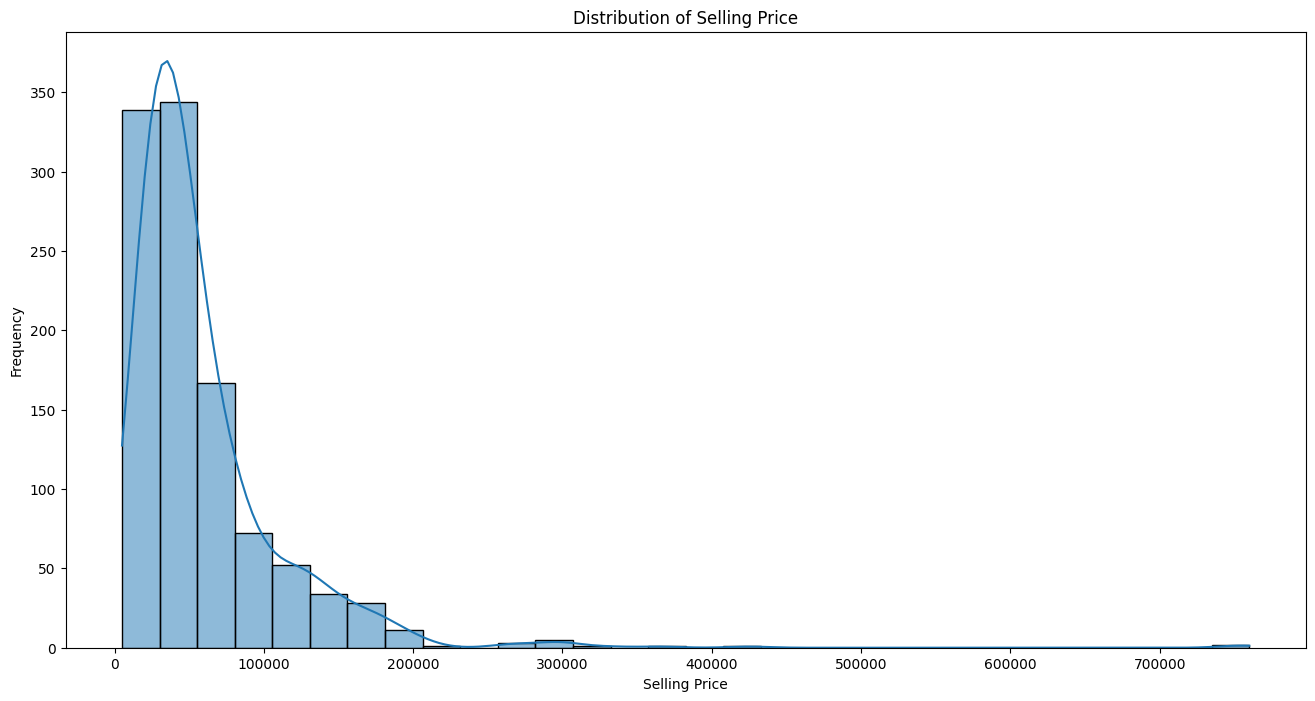

In [4]:
plt.figure(figsize=(16,8))
sns.histplot(df['selling_price'],edgecolor = 'black',bins = 30,kde = True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

- Description:
 - The distribution is right skewed.
 - Most bikes are priced between 20000 to 70000.
 - The data has many outliers.

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

Answer:

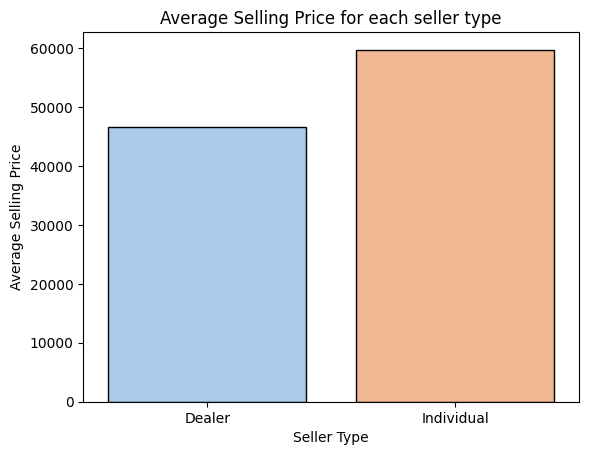

In [5]:
# Average selling price for each seller type
avg = df.groupby('seller_type')['selling_price'].mean().reset_index()
# barplot
sns.barplot(x = 'seller_type',y = 'selling_price',data = avg,palette='pastel',edgecolor= 'black')
plt.title('Average Selling Price for each seller type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

Observation:
 - The average price of the bike in individual seller is greater than dealer.

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

Answer:


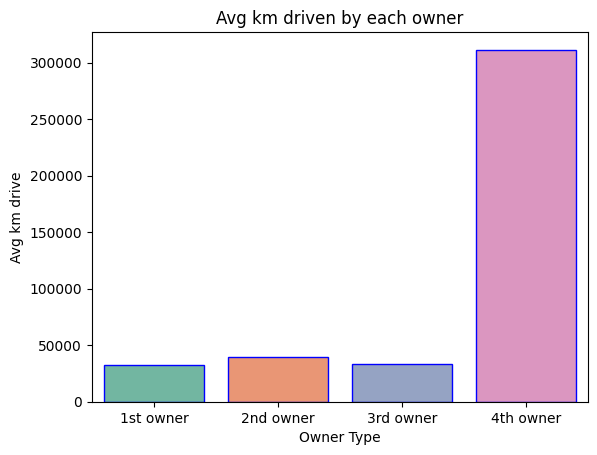

In [6]:
# avg km driven for each ownership type
avg_km_driven = df.groupby('owner')['km_driven'].mean().reset_index()
# bar plot
sns.barplot(x = 'owner',y = 'km_driven',data = avg_km_driven,edgecolor = 'blue',palette= 'Set2')
plt.title('Avg km driven by each owner')
plt.xlabel('Owner Type')
plt.ylabel('Avg km drive')
plt.show()

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

Answer:


In [7]:
Q1 = df['km_driven'].quantile(.25)
Q3 = df['km_driven'].quantile(.75)
IQR = Q3 - Q1
lower_f = Q1 - 1.5*IQR
upper_f = Q3 + 1.5*IQR
df_clean = df[(df['km_driven'] >= lower_f) & (df['km_driven'] <= upper_f)]
print("Befor removing the outliers \n")
print(df['km_driven'].describe())
print("\nAfter removing the outliers \n")
print(df_clean['km_driven'].describe())

Befor removing the outliers 

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing the outliers 

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

Answer:

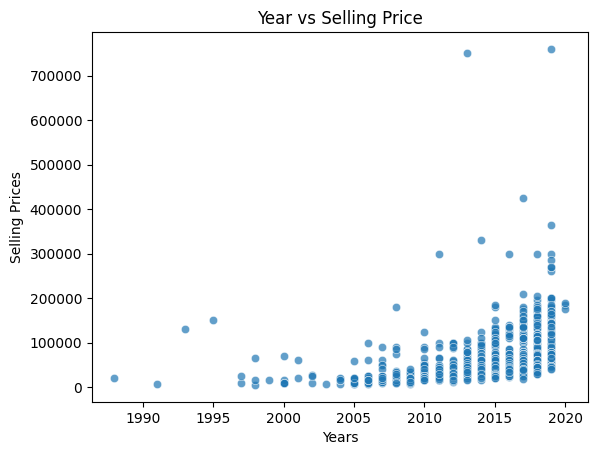

In [8]:
sns.scatterplot(x = 'year',y = 'selling_price',data= df , alpha = 0.7)
plt.title('Year vs Selling Price')
plt.xlabel('Years')
plt.ylabel('Selling Prices')
plt.show()

Insights:
- Selling prices increases over the time. It is Upward trend.
- Some outliers also present this plot.

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

Answer:

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['seller_type']]).toarray()
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
print('The first 5 rows of the resulting dataframe is : \n')
encoded_df.head()

The first 5 rows of the resulting dataframe is : 



,seller_type_Dealer,seller_type_Individual
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

Answer:


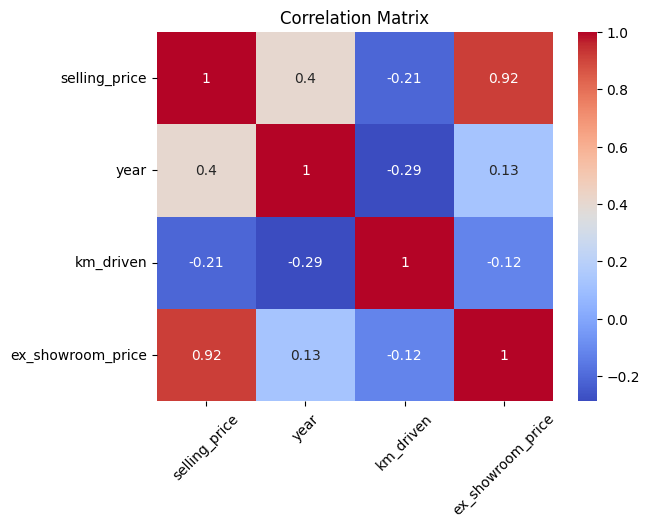

In [10]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot = True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation = 45)
plt.show()

1. Positive correlation : selling_price vs ex_showroom_price ( Bikes with higher showroom price have naturally high selling price).
2. Negetive correlation : km_driven with year, selling_price ( Bikes with more km driven are usually older and sell at lower price.

Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

Answer:
1. From correlation matrix ,ex showroom price factor afffects selling price in a positive way i.e. i means if ex showroom price is high then the selling price of the bike also high. And km_driven factor affects selling price in a negetive way.
2. Data Cleaning & Feature Engineering:
 - ex_showroom price column has many missing values ; we replace them with mean or median(for outliers )
  - km_driven has many outliers we remove then using IQR method.
  - In above I converterd categorical column seller type to numerical using OneHotEncoder method. I had also created some visualization for see the trend and understand about the data.

The number of missing value in ex_exshowroom_price column before computation is :435



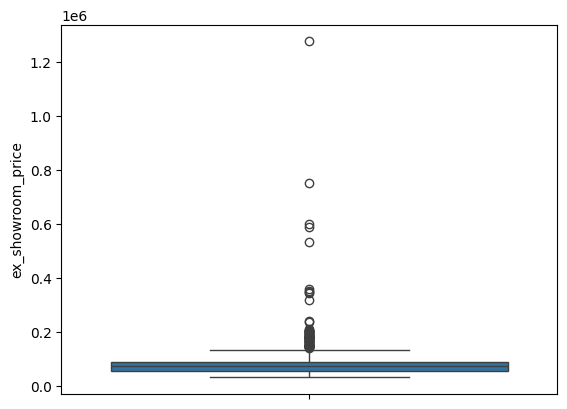

In [11]:
# Missing value computation for ex_showroom_price:
df.ex_showroom_price.isna().sum()
print(f"The number of missing value in ex_exshowroom_price column before computation is :{df.ex_showroom_price.isna().sum()}\n")
#to check the outliers:
sns.boxplot(df['ex_showroom_price'])
plt.show()

In [12]:
#since there are too many outliers, then we fill the missing values with median and remove the outliers.
df['ex_showroom_price']= df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())
print(f"The number of missing value in ex_exshowroom_price column after computation is :{df.ex_showroom_price.isna().sum()}")

The number of missing value in ex_exshowroom_price column after computation is :0
